In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import os
import sys
import logging

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
    
aequ_dir = "/mnt/c/Users/jan.zill/code/aequilibrae"
sys.path.append(aequ_dir)

from aequilibrae import logger  # noqa: E402
stdout_handler = logging.StreamHandler(sys.stdout)
logger.addHandler(stdout_handler)

import utils

In [4]:
code_dir = "/mnt/c/Users/jan.zill/code"
tntp_dir = os.path.join(code_dir, "TransportationNetworks_aequilibrae")
scenario = "Berlin-Center" #"Anaheim" #
folder = os.path.join(tntp_dir, scenario)

if scenario == "Anaheim":
    link_file =  "Anaheim_net.tntp"
    trip_file =  "Anaheim_trips.tntp"
elif scenario == "Berlin-Center":
    link_file =  "berlin-center_net_clean.tntp" # DUPLICATE NODES REMOVED  "berlin-center_net_clean_bpr_altered.tntp" #
    trip_file =  "berlin-center_trips.tntp"
else:
    raise ValueError(f"Unknown scenario {scenario}")

In [5]:
%%time
path_res_ = utils.get_assignment_solution(tntp_dir, scenario, link_file, method="bush-based", block_centroids=False, rgap=5*1e-5)

bush-based Assignment STATS
 Initialised data structures, num nodes = 12981, num links = 28370
 0th iteration done, cost = 17175346.0
Iteration 1, computed gap: 0.03523369394561715, computed objective: 13572901.0
Iteration 2, computed gap: 0.008124234031658073, computed objective: 13446520.0
Iteration 3, computed gap: 0.0018462100719774943, computed objective: 13425886.0
Iteration 4, computed gap: 0.0005136246907306852, computed objective: 13421236.0
Iteration 5, computed gap: 0.00017223551787159952, computed objective: 13420094.0
Iteration 6, computed gap: 7.091238174428138e-05, computed objective: 13419739.0
bush-based Assignment finished. 6 iterations and 7.091238174428138e-05 final gap
CPU times: user 19min 51s, sys: 13min 37s, total: 33min 29s
Wall time: 4min 54s


In [ ]:
%%time
bfw_res_ = utils.get_assignment_solution(tntp_dir, scenario, link_file, method="bfw", block_centroids=False, rgap=5*1e-5)

bfw Assignment STATS
Iteration, RelativeGap, stepsize
1,inf,1.0
2,0.3800567793701656,0.5300666634760473
3,0.02995166794864988,0.4419368001798535
4,0.011215453493207569,0.9740669340921474
5,0.018651911495302792,0.207438236660486
6,0.005588851085212455,0.23649241559763462
7,0.0034952930085653255,0.6993747625312287
8,0.006823974042287565,0.14055669550649857
9,0.0024604856164390475,0.15286896543449707
10,0.002205272541373415,0.293308282199271


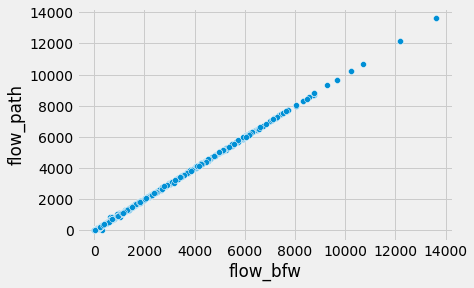

max diff in flow = 271.364
max rel diff in flow = 56.180%


,link_id_bfw,a_node,b_node,capacity_bfw,alpha_bfw,beta_bfw,direction_bfw,flow_bfw,link_id_path,capacity_path,alpha_path,beta_path,direction_path,flow_path,abs_change,rel_change
704,704,354,355,5400,0.15,4,1,304.546982,704,5400,0.15,4,1,33.183468,271.363514,0.891040
667,667,342,343,5400,0.15,4,1,650.530030,667,5400,0.15,4,1,830.113525,179.583495,0.276057
706,706,355,343,5400,0.15,4,1,1017.598121,706,5400,0.15,4,1,868.244873,149.353248,0.146770
758,758,370,371,5400,0.15,4,1,925.147365,758,5400,0.15,4,1,1047.161621,122.014256,0.131886
760,760,371,355,5400,0.15,4,1,713.051139,760,5400,0.15,4,1,835.061462,122.010324,0.171110
702,702,354,342,5400,0.15,4,1,988.982204,702,5400,0.15,4,1,1093.242554,104.260349,0.105422
756,756,370,354,5400,0.15,4,1,1121.615256,756,5400,0.15,4,1,1023.477844,98.137412,0.087497
845,845,394,393,5400,0.15,4,1,3163.161190,845,5400,0.15,4,1,3070.333008,92.828182,0.029347
838,838,392,391,5400,0.15,4,1,1409.428345,838,5400,0.15,4,1,1326.485229,82.943115,0.058849
841,841,393,392,5400,0.15,4,1,1409.428345,841,5400,0.15,4,1,1326.485229,82.943115,0.058849


In [7]:
full_result = bfw_res_.drop(columns=['time']).merge(path_res_.drop(columns=['time']), on=['a_node', 'b_node'], how='outer', suffixes=['_bfw', '_path'])
sns.scatterplot(data=full_result, x='flow_bfw', y='flow_path');
plt.show();
full_result['abs_change'] = np.abs(full_result.flow_bfw - full_result.flow_path)
full_result['rel_change'] = full_result['abs_change'] / full_result['flow_bfw']
print(f"max diff in flow = {full_result['abs_change'].max():.3f}")
print(f"max rel diff in flow = {full_result['rel_change'].abs().max():.3f}%")
display(full_result.sort_values(by=['abs_change'], ascending=False).head(10))